In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("nesarc_pds.csv", low_memory=False)

In [3]:
data.columns=map(str.upper,data.columns)

In [4]:
data.head()

,UNNAMED: 0,ETHRACE2A,ETOTLCA2,IDNUM,PSU,STRATUM,WEIGHT,CDAY,CMON,CYEAR,...,SOLP12ABDEP,HAL12ABDEP,HALP12ABDEP,MAR12ABDEP,MARP12ABDEP,HER12ABDEP,HERP12ABDEP,OTHB12ABDEP,OTHBP12ABDEP,NDSYMPTOMS
0,0,5,,1,4007,403,3928.613505,14,8,2001,...,0,0,0,0,0,0,0,0,0,NaN
1,1,5,0.0014,2,6045,604,3638.691845,12,1,2002,...,0,0,0,0,0,0,0,0,0,NaN
2,2,5,,3,12042,1218,5779.032025,23,11,2001,...,0,0,0,0,0,0,0,0,0,NaN
3,3,5,,4,17099,1704,1071.754303,9,9,2001,...,0,0,0,0,0,0,0,0,0,NaN
4,4,2,,5,17099,1704,4986.952377,18,10,2001,...,0,0,0,0,0,0,0,0,0,NaN


5 Variables I'll taking in this codebook:
____________________________________________________

CONSUMER = Drinking Status

S1Q2C2 = Raised by relatives before 18 age

SMOKER = Tobacco use status.

S3AQ52 = Age started smoking cigars everyday.

S2AQ19 = Age at start of period of Heaviest drinking.







_____________________________________________________

## NOTE :
### Since, I've not used Spyder IDE therefore codes syntax have slight changes as compared to Video Lectures.  Hope, you'll understand each and every code, I've created comments for your reference wherever needed.

In [5]:
sub= data[['CONSUMER','S1Q2C2', 'SMOKER', 'S3AQ52', 'S2AQ19']]

In [6]:
sub1 = sub.copy()

In [7]:
sub1.head()

,CONSUMER,S1Q2C2,SMOKER,S3AQ52,S2AQ19
0,3,,3,,
1,1,,3,,21
2,3,,3,,
3,2,,3,,16
4,2,,3,,18


### 1) Managing variable - CONSUMER (DRINKING STATUS)

CONSUMER :
                 1. Current drinker
                 2. Ex-drinker
                 3. Lifetime Abstainer
 
 #### Since this is counter intuitive we can change this to :
 
                 0) Lifetime Abstrainer(One who never did drinking)
                 1) Ex-Drinker
                 2) Current Drinker

In [8]:
print("Before labels (CONSUMER) : ")
print(sorted(sub1['CONSUMER'].unique()))

Before labels (CONSUMER) : 
[1, 2, 3]


In [9]:
def recode1(val):
    if val==1:
        return 2
    if val==2:
        return 1
    if val==3:
        return 0

In [10]:
sub1['CONSUMER_NEWL'] = sub1['CONSUMER'].apply(lambda x : recode1(x))

In [11]:
print("After labels (CONSUMER_NEWL) : ")
print(sorted(sub1['CONSUMER_NEWL'].unique()))

After labels (CONSUMER_NEWL) : 
[0, 1, 2]


In [12]:
sub1.head()

,CONSUMER,S1Q2C2,SMOKER,S3AQ52,S2AQ19,CONSUMER_NEWL
0,3,,3,,,0
1,1,,3,,21,2
2,3,,3,,,0
3,2,,3,,16,1
4,2,,3,,18,1


### 2) Managing variable - SMOKER (SMOKING STATUS)

SMOKER :
                 1. Current user
                 2. Ex-user
                 3. Lifetime nonsmoker
 
 #### Since, this is also counter intuitive we can change this to :
 
                 0) Lifetime nonsmoker
                 1) Ex-user
                 2) Current user

In [13]:
print("Before labels (SMOKER) : ")
print(sorted(sub1['SMOKER'].unique()))

Before labels (SMOKER) : 
[1, 2, 3]


In [14]:
#using above 'recode1' function here too.
sub1['SMOKER_NEWL'] = sub1['SMOKER'].apply(lambda x : recode1(x))

In [15]:
sub1.head()

,CONSUMER,S1Q2C2,SMOKER,S3AQ52,S2AQ19,CONSUMER_NEWL,SMOKER_NEWL
0,3,,3,,,0,0
1,1,,3,,21,2,0
2,3,,3,,,0,0
3,2,,3,,16,1,0
4,2,,3,,18,1,0


In [16]:
print("After labels (SMOKER_NEWL) : ")
print(sorted(sub1['SMOKER_NEWL'].unique()))

After labels (SMOKER_NEWL) : 
[0, 1, 2]


In [17]:
columnsTitles = ['CONSUMER','SMOKER', 'S1Q2C2', 'S3AQ52', 'S2AQ19', 'CONSUMER_NEWL','SMOKER_NEWL']

sub1 = sub1.reindex(columns=columnsTitles)

In [18]:
sub1.head()

,CONSUMER,SMOKER,S1Q2C2,S3AQ52,S2AQ19,CONSUMER_NEWL,SMOKER_NEWL
0,3,3,,,,0,0
1,1,3,,,21,2,0
2,3,3,,,,0,0
3,2,3,,,16,1,0
4,2,3,,,18,1,0


In [19]:
sub1['CONSUMER_NEWL'].value_counts(sort=False)

0     8266
1     7881
2    26946
Name: CONSUMER_NEWL, dtype: int64

In [20]:
sub1['SMOKER_NEWL'].value_counts(sort=False)

0    23901
1     8074
2    11118
Name: SMOKER_NEWL, dtype: int64

### 3) Managing variable - S3AQ52 (AGE STARTED SMOKING CIGARS EVERY DAY)


In [21]:
sub1['S3AQ52'].unique()

array([' ', '21', '16', '20', '30', '40', '17', '25', '15', '35', '38',
       '37', '26', '53', '24', '54', '18', '28', '55', '45', '32', '22',
       '48', '39', '50', '34', '99', '36', '12', '60', '42', '51', '23',
       '64', '47', '29', '19', '9', '70', '41', '52', '33', '46', '31',
       '59', '8', '10', '44', '43', '65', '57', '69', '58', '27', '66',
       '14', '84', '5', '11', '13', '49', '62', '63', '80', '56'],
      dtype=object)

In [22]:
sub1[sub1['S3AQ52']==" "]

,CONSUMER,SMOKER,S1Q2C2,S3AQ52,S2AQ19,CONSUMER_NEWL,SMOKER_NEWL
0,3,3,,,,0,0
1,1,3,,,21,2,0
2,3,3,,,,0,0
3,2,3,,,16,1,0
4,2,3,,,18,1,0
...,...,...,...,...,...,...,...
43088,3,3,,,,0,0
43089,1,3,,,18,2,0
43090,1,1,,,17,2,2
43091,1,1,2,,24,2,2


In [23]:
#Converting blank values or People who never smoked to 0
sub1.loc[sub1['S3AQ52']==" ", 'S3AQ52'] = 0 

In [24]:
#Converting String values of Dataframe to Numeric
sub1['S3AQ52']= pd.to_numeric(sub1['S3AQ52'])

In [25]:
sub1['S3AQ52'].unique()

array([ 0, 21, 16, 20, 30, 40, 17, 25, 15, 35, 38, 37, 26, 53, 24, 54, 18,
       28, 55, 45, 32, 22, 48, 39, 50, 34, 99, 36, 12, 60, 42, 51, 23, 64,
       47, 29, 19,  9, 70, 41, 52, 33, 46, 31, 59,  8, 10, 44, 43, 65, 57,
       69, 58, 27, 66, 14, 84,  5, 11, 13, 49, 62, 63, 80, 56],
      dtype=int64)

In [26]:
#Converting '99' (People who not answered this question in survey) to NaN. 
sub1.loc[sub1['S3AQ52']==99, 'S3AQ52'] = np.nan

In [27]:
sub1['S3AQ52'].unique()

array([ 0., 21., 16., 20., 30., 40., 17., 25., 15., 35., 38., 37., 26.,
       53., 24., 54., 18., 28., 55., 45., 32., 22., 48., 39., 50., 34.,
       nan, 36., 12., 60., 42., 51., 23., 64., 47., 29., 19.,  9., 70.,
       41., 52., 33., 46., 31., 59.,  8., 10., 44., 43., 65., 57., 69.,
       58., 27., 66., 14., 84.,  5., 11., 13., 49., 62., 63., 80., 56.])

In [28]:
sub1.head()

,CONSUMER,SMOKER,S1Q2C2,S3AQ52,S2AQ19,CONSUMER_NEWL,SMOKER_NEWL
0,3,3,,0.0,,0,0
1,1,3,,0.0,21,2,0
2,3,3,,0.0,,0,0
3,2,3,,0.0,16,1,0
4,2,3,,0.0,18,1,0


Now, Column S3AQ52 is managed and prepared.

### 4) Managing variable - S2AQ19  (AGE AT START OF PERIOD OF HEAVIEST DRINKING)


In [29]:
sub1['S2AQ19'].unique()

array([' ', '21', '16', '18', '30', '17', '28', '43', '26', '23', '20',
       '51', '19', '40', '35', '27', '42', '22', '15', '36', '25', '24',
       '68', '99', '29', '52', '31', '33', '57', '38', '39', '32', '90',
       '49', '50', '37', '34', '59', '63', '58', '55', '53', '79', '56',
       '77', '41', '64', '8', '73', '6', '70', '13', '72', '44', '47',
       '54', '14', '46', '48', '61', '65', '10', '76', '69', '5', '45',
       '71', '60', '67', '12', '62', '74', '86', '66', '81', '82', '9',
       '75', '83', '80', '78', '7', '87', '11', '85', '84', '91', '88'],
      dtype=object)

In [30]:
#Pepole who are lifetime abstainer
sub1[sub1['S2AQ19']==" "]

,CONSUMER,SMOKER,S1Q2C2,S3AQ52,S2AQ19,CONSUMER_NEWL,SMOKER_NEWL
0,3,3,,0.0,,0,0
2,3,3,,0.0,,0,0
22,3,1,,0.0,,0,2
23,3,3,,0.0,,0,0
26,3,3,,0.0,,0,0
...,...,...,...,...,...,...,...
43070,3,1,,0.0,,0,2
43071,3,3,,0.0,,0,0
43072,3,3,,0.0,,0,0
43082,3,3,,0.0,,0,0


In [31]:
#Converting blank values or People who are lifetime abstainer to 0
sub1.loc[sub1['S2AQ19']==" ", 'S2AQ19'] = 0 

In [32]:
#Converting String values of Dataframe to Numeric
sub1['S2AQ19']= pd.to_numeric(sub1['S2AQ19'])

In [33]:
sub1['S3AQ52'].unique()

array([ 0., 21., 16., 20., 30., 40., 17., 25., 15., 35., 38., 37., 26.,
       53., 24., 54., 18., 28., 55., 45., 32., 22., 48., 39., 50., 34.,
       nan, 36., 12., 60., 42., 51., 23., 64., 47., 29., 19.,  9., 70.,
       41., 52., 33., 46., 31., 59.,  8., 10., 44., 43., 65., 57., 69.,
       58., 27., 66., 14., 84.,  5., 11., 13., 49., 62., 63., 80., 56.])

In [34]:
sub1.head()

,CONSUMER,SMOKER,S1Q2C2,S3AQ52,S2AQ19,CONSUMER_NEWL,SMOKER_NEWL
0,3,3,,0.0,0,0,0
1,1,3,,0.0,21,2,0
2,3,3,,0.0,0,0,0
3,2,3,,0.0,16,1,0
4,2,3,,0.0,18,1,0


Now, Column S2AQ19 is also managed and prepared.

### 5) Managing variable - S1Q2C2 (RAISED BY RELATIVES BEFORE AGE 18)


In [35]:
sub1['S1Q2C2'].unique()

array([' ', '1', '2', '9'], dtype=object)

In [36]:
sub1['S1Q2C2'].value_counts(dropna=False)41679

     41679
1      649
2      553
9      212
Name: S1Q2C2, dtype: int64

In [37]:
#Converting blank values or People who are raised by parent(s) to 0.
sub1.loc[sub1['S1Q2C2']==" ", 'S1Q2C2'] = 0

In [38]:
sub1['S1Q2C2'].value_counts(dropna=False)

0    41679
1      649
2      553
9      212
Name: S1Q2C2, dtype: int64

In [39]:
#Converting value = 2 to 0.
sub1.loc[sub1['S1Q2C2']=="2", 'S1Q2C2'] = 0

In [40]:
#Converting value = 9  to NaN.
sub1.loc[sub1['S1Q2C2']=="9", 'S1Q2C2'] = np.nan

In [41]:
sub1['S1Q2C2'].unique()

array([0, '1', nan], dtype=object)

In [76]:
sub1['S1Q2C2'].value_counts(dropna=False)

0      42232
1        649
NaN      212
Name: S1Q2C2, dtype: int64

In [44]:
sub1.head()

,CONSUMER,SMOKER,S1Q2C2,S3AQ52,S2AQ19,CONSUMER_NEWL,SMOKER_NEWL
0,3,3,0,0.0,0,0,0
1,1,3,0,0.0,21,2,0
2,3,3,0,0.0,0,0,0
3,2,3,0,0.0,16,1,0
4,2,3,0,0.0,18,1,0


Now, Column S1Q2C2 is also managed and prepared.

And we can now remove cols CONSUMER and SMOKER for further analysis.



In [49]:
sub1.drop(columns=['CONSUMER','SMOKER'],axis=1,inplace=True)

In [51]:
sub1.head()

,S1Q2C2,S3AQ52,S2AQ19,CONSUMER_NEWL,SMOKER_NEWL
0,0,0.0,0,0,0
1,0,0.0,21,2,0
2,0,0.0,0,0,0
3,0,0.0,16,1,0
4,0,0.0,18,1,0


# Visualizing Variables :

### 1) DRINKING STATUS (Categorical)
0) Lifetime Abstrainer(One who never did drinking)

1) Ex-Drinker

2) Current Drinker

In [ ]:
#dropping all null rows having null values
sub1 = sub1.dropna()

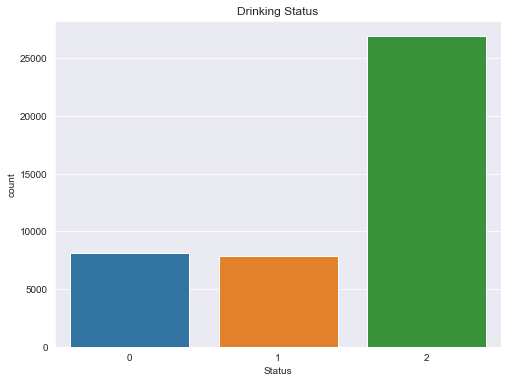

In [158]:
sns.set_style('darkgrid')
plt.figure(figsize=(8,6))
sns.countplot(sub1['CONSUMER_NEWL'])
plt.xlabel('Status')
plt.title("Drinking Status")
plt.show()

#### From the graph we can observe that most of the people(62%) are current users of alcohol.

In [160]:
sub1['CONSUMER_NEWL'].value_counts(dropna=True,normalize=True)*100

2    62.734760
0    18.948744
1    18.316497
Name: CONSUMER_NEWL, dtype: float64

### 2) TOBACCO STATUS (Categorical)
0) Lifetime nonsmoker

1) Ex-user

2) Current user

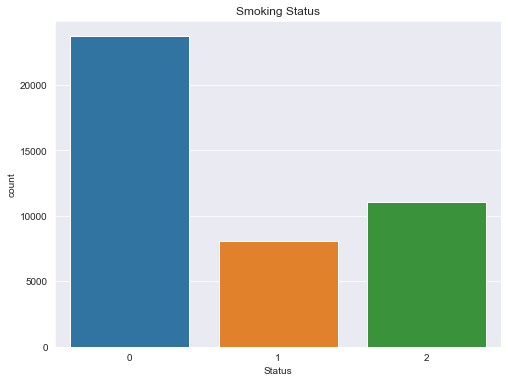

In [161]:
plt.figure(figsize=(8,6))
sns.countplot(sub1['SMOKER_NEWL'])
plt.xlabel('Status')
plt.title("Smoking Status")
plt.show()

#### From the graph we can observe that approximate more than 50% are lifetime non-smokers.

In [162]:
sub1['SMOKER_NEWL'].value_counts(dropna=False,normalize=True)*100

0    55.374099
2    25.852134
1    18.773768
Name: SMOKER_NEWL, dtype: float64

### 3) S1Q2C2 - RAISED BY RELATIVES BEFORE AGE 18   (Categorical)
0) No

1) Yes

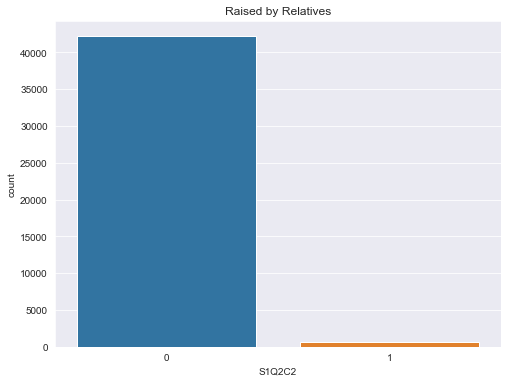

In [163]:
plt.figure(figsize=(8,6))
sns.countplot(sub1['S1Q2C2'])
plt.title('Raised by Relatives')
plt.show()

#### We can observe that very tiny amount of children(i.e 1.5%) are raised by relatives as compared to those who are raised by parents.

In [164]:
sub1['S1Q2C2'].value_counts(dropna=False,normalize=True)*100

0    98.485874
1     1.514126
Name: S1Q2C2, dtype: float64

# NOTE : 
## Since, There is very less amount of data for children raised by relatives under age of 18, My Research question can't be analysed properly.Therefore I'm changing my research question to :

## Children who are in Colleges having age between (18-24) tend to drink and smoke more as compared to other aged people.

### 4) S3AQ52 -  AGE STARTED SMOKING CIGARS EVERY DAY   
0    - Never smoked

5-84 - Age at which they started smoking cigars everyday.

In [165]:
#Those people who do not smoke.
sub1[sub1['S3AQ52']==0]

,S1Q2C2,S3AQ52,S2AQ19,CONSUMER_NEWL,SMOKER_NEWL
0,0,0.0,0,0,0
1,0,0.0,21,2,0
2,0,0.0,0,0,0
3,0,0.0,16,1,0
4,0,0.0,18,1,0
...,...,...,...,...,...
43088,0,0.0,0,0,0
43089,0,0.0,18,2,0
43090,0,0.0,17,2,2
43091,0,0.0,24,2,2


In [166]:
sub1['AgeGroupSmokingHeavy'] = pd.cut(sub2['S3AQ52'],[17,23,29,35,41,47])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [170]:
sub1.head()

,S1Q2C2,S3AQ52,S2AQ19,CONSUMER_NEWL,SMOKER_NEWL,AgeGroupSmokingHeavy
0,0,0.0,0,0,0,NaN
1,0,0.0,21,2,0,NaN
2,0,0.0,0,0,0,NaN
3,0,0.0,16,1,0,NaN
4,0,0.0,18,1,0,NaN


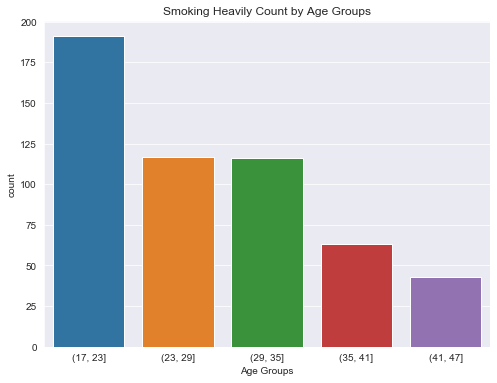

In [169]:
plt.figure(figsize=(8,6))
sns.countplot(sub1['AgeGroupSmokingHeavy'])
plt.xlabel("Age Groups")
plt.title("Smoking Heavily Count by Age Groups")
plt.show()

#### We can observe(-ve Linear Graph) showing that age group (17-23)  are smoking more as compared to rest of the groups.


In [172]:
sub1['AgeGroupSmokingHeavy'].value_counts(dropna=True)

(17, 23]    191
(23, 29]    117
(29, 35]    116
(35, 41]     63
(41, 47]     43
Name: AgeGroupSmokingHeavy, dtype: int64

### 5) S2AQ19  (AGE AT START OF PERIOD OF HEAVIEST DRINKING)  
0    - Never drink

5-84 - Age at which they started smoking cigars everyday.

In [173]:
sub1['S2AQ19'].value_counts()

0     8122
21    3829
18    3342
20    2377
19    1956
      ... 
6        3
87       3
7        2
88       2
91       1
Name: S2AQ19, Length: 88, dtype: int64

In [174]:
sub1['AgeGroupDrinkingHeavy'] = pd.cut(sub2['S2AQ19'],[17,23,29,35,41,47])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [175]:
sub1.head()

,S1Q2C2,S3AQ52,S2AQ19,CONSUMER_NEWL,SMOKER_NEWL,AgeGroupSmokingHeavy,AgeGroupDrinkingHeavy
0,0,0.0,0,0,0,NaN,NaN
1,0,0.0,21,2,0,NaN,NaN
2,0,0.0,0,0,0,NaN,NaN
3,0,0.0,16,1,0,NaN,NaN
4,0,0.0,18,1,0,NaN,NaN


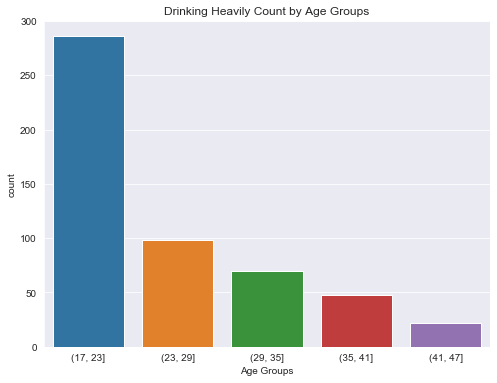

In [176]:
plt.figure(figsize=(8,6))
sns.countplot(sub3['AgeGroupDrinkingHeavy'])
plt.xlabel("Age Groups")
plt.title("Drinking Heavily Count by Age Groups")
plt.show()

#### We can observe(-ve Linear Graph) showing that age group (17-23)  consume more alcohol as compared to rest of the age groups.

In [179]:
sub1['AgeGroupDrinkingHeavy'].value_counts(dropna=True)

(17, 23]    282
(23, 29]     96
(29, 35]     69
(35, 41]     46
(41, 47]     22
Name: AgeGroupDrinkingHeavy, dtype: int64

## Now, all the 5 variables I've visualised above.
## Next, I'll show relationship between them.

In [180]:
sub1.head(10)

,S1Q2C2,S3AQ52,S2AQ19,CONSUMER_NEWL,SMOKER_NEWL,AgeGroupSmokingHeavy,AgeGroupDrinkingHeavy
0,0,0.0,0,0,0,NaN,NaN
1,0,0.0,21,2,0,NaN,NaN
2,0,0.0,0,0,0,NaN,NaN
3,0,0.0,16,1,0,NaN,NaN
4,0,0.0,18,1,0,NaN,NaN
5,0,0.0,18,2,0,NaN,NaN
6,0,0.0,18,2,0,NaN,NaN
7,0,0.0,30,2,0,NaN,NaN
8,0,0.0,21,2,0,NaN,NaN
9,0,0.0,17,2,0,NaN,NaN


In [182]:
sub2 = sub1.dropna()

In [181]:
sub1.shape

(42863, 7)

In [183]:
sub2.shape

(410, 7)

## Relationship between Consumption of Alcohol and Tobacco use

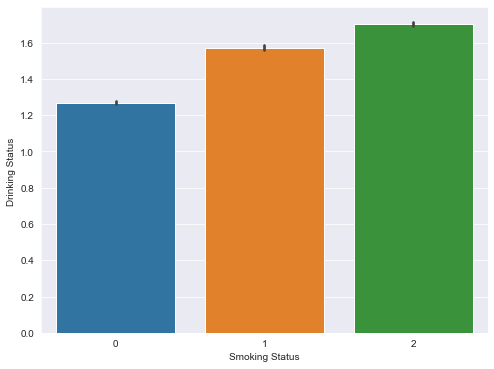

In [226]:
plt.figure(figsize=(8,6))
sns.barplot(y='CONSUMER_NEWL',x='SMOKER_NEWL',data=sub1)
plt.xlabel("Smoking Status")
plt.ylabel("Drinking Status ")
plt.show()

### We can see there is Positive Linear Relationship between Tobacco use and Drinking, means those who are heavy smokers are also heavy alcohol consumers.

## Relationship Between Age Groups, Drinking and Smoking habbit.

In [184]:
sub2.head()

,S1Q2C2,S3AQ52,S2AQ19,CONSUMER_NEWL,SMOKER_NEWL,AgeGroupSmokingHeavy,AgeGroupDrinkingHeavy
43,0,21.0,40,2,1,"(17, 23]","(35, 41]"
745,0,20.0,18,2,2,"(17, 23]","(17, 23]"
927,0,30.0,19,1,2,"(29, 35]","(17, 23]"
984,0,40.0,22,2,2,"(35, 41]","(17, 23]"
1388,0,25.0,30,2,1,"(23, 29]","(29, 35]"


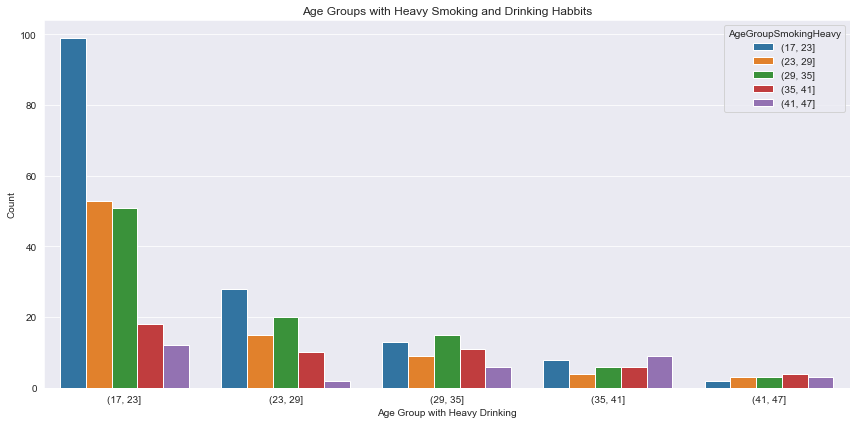

In [227]:
plt.figure(figsize=(12,6))
sns.countplot(sub2['AgeGroupDrinkingHeavy'],hue=sub2['AgeGroupSmokingHeavy'])
plt.title("Age Groups with Heavy Smoking and Drinking Habbits")
plt.xlabel('Age Group with Heavy Drinking')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### We can observe decline(-ve Linear Relation) in count of age groups consuming both alcohols and tobacoo and The young adults of age(17-23) amongst all age groups are most drinkers and smokers.
### Hence, my taken Hypothesis is visually true.